**ER-Model**

number of nodes : 1024
number of edges : 5291
Average degree: 10.333984375
Average clustering coefficient: 0.011224258360708035


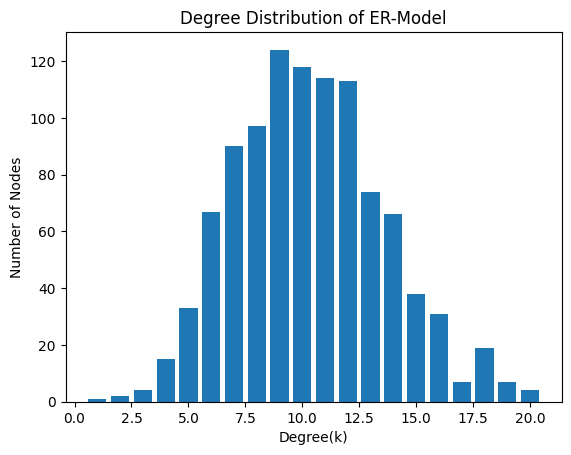

In [ ]:
import random
import matplotlib.pyplot as plt
import networkx as nx
import community
# Generate an Erdős-Rényi random graph with n nodes and probability p
n = 1024
p = 0.0099999
er_graph = nx.erdos_renyi_graph(n, p)

#*********** print the network properties ***********************
print("number of nodes :",len(er_graph.nodes()))
print("number of edges :",len(er_graph.edges()))
avg_degree = sum(dict(er_graph.degree()).values()) / n
print("Average degree:", avg_degree)

avg_clustering = nx.average_clustering(er_graph)
print("Average clustering coefficient:", avg_clustering)

# ************# plot degree distribution*****************
degrees = dict(er_graph.degree())
degree_values = sorted(set(degrees.values())) 
degree_counts = [list(degrees.values()).count(x) for x in degree_values]


plt.bar(degree_values, degree_counts)
plt.xlabel('Degree(k)')
plt.ylabel('Number of Nodes')
plt.title('Degree Distribution of ER-Model')
plt.show()

# *************** # plot the network  *****************
# degrees = dict(er_graph.degree())
# node_colors = [degrees[node] for node in er_graph.nodes()]

# nx.draw(er_graph, node_color=node_colors, with_labels=True)
# plt.show()


**Barabasi-Model**

number of nodes : 1024
number of edges : 6108
Average degree: 11.9296875
Average clustering coefficient: 0.04372936342936496


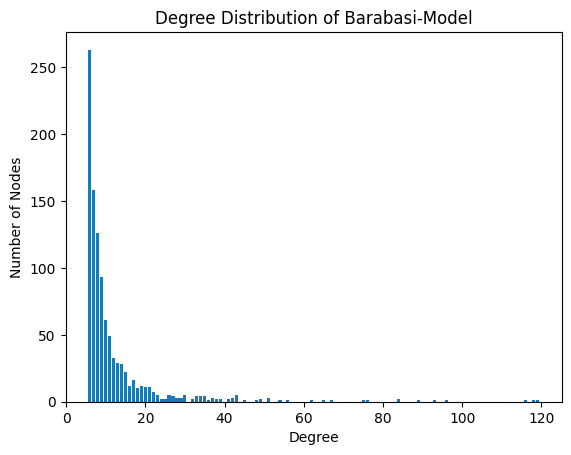

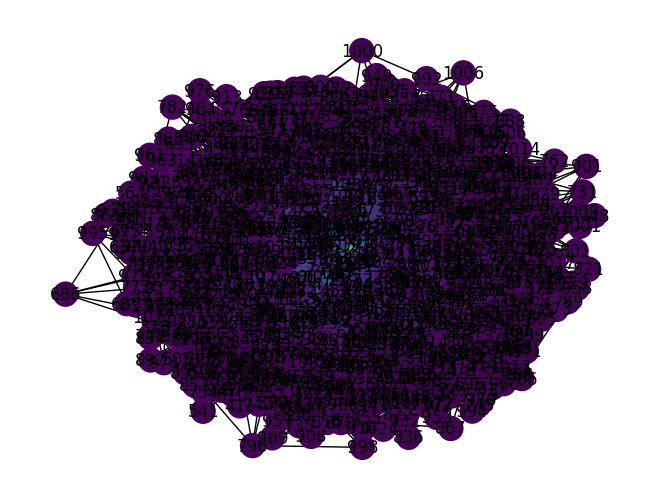

In [ ]:
import networkx as nx
import community
import matplotlib.pyplot as plt
from networkx.algorithms.community import greedy_modularity_communities
n=1024
#************* generate a Barabasi-Albert model with 100 nodes *************
Ba= nx.barabasi_albert_graph(n, 6)

#**************** print network properties *********************
print("number of nodes :",len(Ba.nodes()))
print("number of edges :",len(Ba.edges()))
avg_degree = sum(dict(Ba.degree()).values()) / n
print("Average degree:", avg_degree)

avg_clustering = nx.average_clustering(Ba)
print("Average clustering coefficient:", avg_clustering)

# ********* plot degree distribution ************
degrees = dict(Ba.degree())  
degree_values = sorted(set(degrees.values())) 
degree_counts = [list(degrees.values()).count(x) for x in degree_values]
plt.bar(degree_values, degree_counts)
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.title('Degree Distribution of Barabasi-Model')
plt.show()

# set color to node
degrees = dict(Ba.degree())
node_colors = [degrees[node] for node in Ba.nodes()]

# plot the graph
nx.draw(Ba, node_color=node_colors, with_labels=True)
plt.show()




**Part-1**

avrage degree : 15.001953125
Number of nodes: 1024
Number of edges: 7681
Average clustering coefficient: 0.38542651998854827
Number of triangles: 13833.0


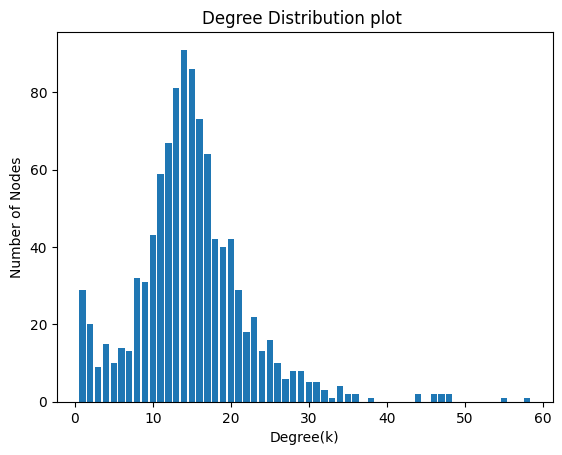

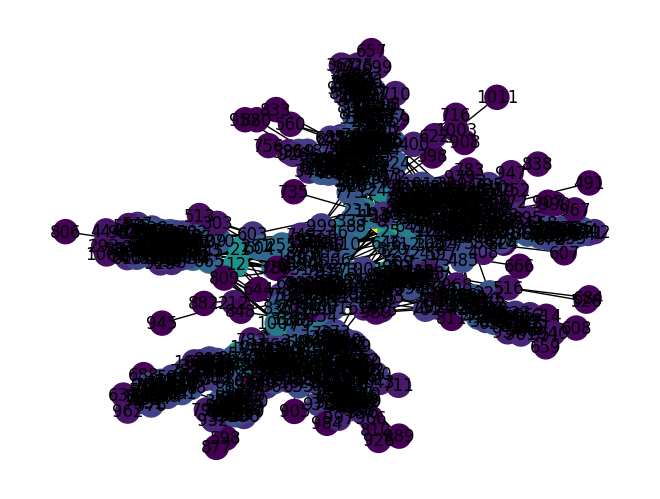

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import community
# ********************* Random generator based on probability *****************************
def generate_network(n, avg_deg,p):
    nodes = [0]
    edges = []

    for i in range(1, n):
        node = i
        neighbor = random.choice(nodes)
        nodes.append(node)
        edges.append((node, neighbor))
    

    fof = {}
    neighbors = {}
    for node in nodes:
        neighbors[node] = []
        fof[node] = []
    for edge in edges:
        neighbors[edge[0]].append(edge[1])
        neighbors[edge[1]].append(edge[0])

    for node in nodes:
        for neighbor in neighbors[node]:
            for fof_neighbor in neighbors[neighbor]: 
                if fof_neighbor != node and fof_neighbor not in neighbors[node] and fof_neighbor not in fof[node]:
                    fof[node].append(fof_neighbor)
 
    avg_degree = (2*(n-1))/n
    # print("average degree initionally ",avg_degree)
    nodes_list = list(range(n))
    total_degree = 2*(n-1)
    ind=0
    while avg_degree <= avg_deg:
        # node = random.choice(nodes_list)
        ind=ind%n
        node=nodes_list[ind]
        ind+=1
        r=2
        if len(fof[node]) > 0:
            r=1/len(fof[node])
            chosen = random.choice(fof[node])            
            if(r<=p):
                edges.append((node, chosen))
                neighbors[node].append(chosen)
                neighbors[chosen].append(node)
                total_degree += 2
            else:
              continue

            # Update the fof list for the affected nodes
            for neighbor in neighbors[node]:
                if neighbor != chosen :
                    for fof_neighbor in neighbors[neighbor]:
                        if fof_neighbor != node and fof_neighbor not in neighbors[node] and fof_neighbor not in fof[node]:
                            fof[node].append(fof_neighbor)
                else:
                    fof[node].remove(chosen)
            for neighbor in neighbors[chosen]:
                if neighbor != node:
                    for fof_neighbor in neighbors[neighbor]:
                        if fof_neighbor != chosen and fof_neighbor not in neighbors[chosen] and fof_neighbor not in fof[chosen]:
                            fof[chosen].append(fof_neighbor)
                else:
                    if node in fof[chosen]:
                        fof[chosen].remove(node)
        avg_degree = total_degree/n
    print("avrage degree :",avg_degree)
    return neighbors,edges

n=1024
adj,edges=generate_network(n,15,0.5)  
G = nx.Graph()
for i in range(n):
    G.add_node(i)
for edge in edges:
    G.add_edge(edge[0],edge[1])
# ********************* store edges into file3 *****************
'''
header=["Node1","Node2"]
with open('file34.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    # write the header
    writer.writerow(header)

    # write the data
    for i in G.edges():
        writer.writerow(i)
'''
# *************** print network properties ***********************
print("Number of nodes:",len(G.nodes()))
print("Number of edges:",len(G.edges()))
average_clustering_coefficient = nx.average_clustering(G)
print(f"Average clustering coefficient: {average_clustering_coefficient}")

triangles = nx.triangles(G)
num_triangles = sum(triangles.values()) / 3
print("Number of triangles:", num_triangles)
# *************** plot degree distribution *************************
degrees = dict(G.degree())
degree_values = sorted(set(degrees.values()))
degree_counts = [list(degrees.values()).count(x) for x in degree_values]

plt.bar(degree_values, degree_counts)
plt.xlabel('Degree(k)')
plt.ylabel('Number of Nodes')
plt.title('Degree Distribution plot ')
plt.show()


# set the colour for node
degrees = dict(G.degree())
node_colors = [degrees[node] for node in G.nodes()]

# plot the graph
nx.draw(G, node_color=node_colors, with_labels=True)
plt.show()

**Part-2**

avrage degree: 15.001953125
Number of nodes:  1024
Number of edges:  7681
Average clustering coefficient: 0.45387837709706524
Number of triangles: 13833.0


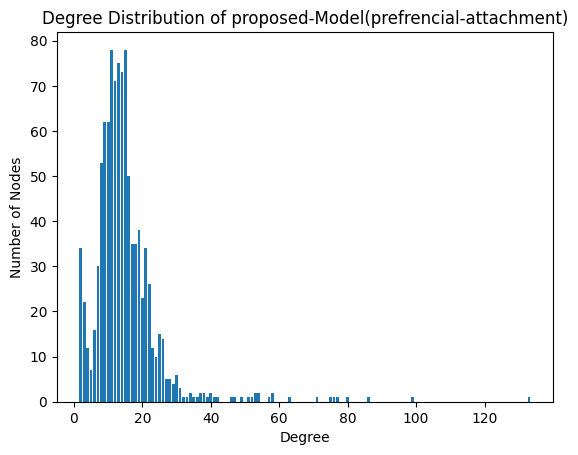

In [ ]:
import random
import matplotlib.pyplot as plt
import networkx as nx
# *********************  prefrencial attachment  *****************************
def generate_network(n, avg_deg):
    nodes = [0]
    edges = []
    
    for i in range(1, n):
        node = i
        neighbor = random.choice(nodes)
        nodes.append(node)
        edges.append((node, neighbor))
    
    
    fof = {}
    neighbors = {}
    for node in nodes:
        neighbors[node] = []
        fof[node] = []
    for edge in edges:
        neighbors[edge[0]].append(edge[1])
        neighbors[edge[1]].append(edge[0])

    for node in nodes:
        for neighbor in neighbors[node]:
            for fof_neighbor in neighbors[neighbor]: 
                if fof_neighbor != node and fof_neighbor not in neighbors[node] and fof_neighbor not in fof[node]:
                    fof[node].append(fof_neighbor) 
    
    avg_degree = (2*(n-1))/n
    # print("average degree initionally ",avg_degree)
    nodes_list = list(range(n))
    total_degree = 2*(n-1)
    ind=0
    while avg_degree <= avg_deg:
        ind=ind%n
        # node = random.choice(nodes_list)
        node=nodes_list[ind]
        ind+=1
        
        
        if len(fof[node]) > 0:
            chosen = random.choice(fof[node])
            r=2
            d=len(neighbors[chosen])
            td=0
            for x in fof[node]:
                td+=len(neighbors[x])
            if(td!=0):
                r=d/td
            p=random.random()
            if(p<=r):
                edges.append((node, chosen))
                neighbors[node].append(chosen)
                neighbors[chosen].append(node)
                total_degree += 2
            else :
              continue

            # Update the fof list for the affected nodes
            for neighbor in neighbors[node]:
                if neighbor != chosen :
                    for fof_neighbor in neighbors[neighbor]:
                        if fof_neighbor != node and fof_neighbor not in neighbors[node] and fof_neighbor not in fof[node]:
                            fof[node].append(fof_neighbor)
                else:
                    fof[node].remove(chosen)
            for neighbor in neighbors[chosen]:
                if neighbor != node:
                    for fof_neighbor in neighbors[neighbor]:
                        if fof_neighbor != chosen and fof_neighbor not in neighbors[chosen] and fof_neighbor not in fof[chosen]:
                            fof[chosen].append(fof_neighbor)
                else:
                    if node in fof[chosen]:
                        fof[chosen].remove(node)
        avg_degree = total_degree/n
    print("avrage degree:",avg_degree)
    return neighbors,edges

n=1024
adj,edges=generate_network(n,15)  
Grp = nx.Graph()
for i in range(n):
    Grp.add_node(i)
for eg in edges:
    Grp.add_edge(eg[0],eg[1])

# ********************* store edges into file3 ************************
'''
header=["Node1","Node2"]
with open('file34.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    # write the header
    writer.writerow(header)

    # write the data
    for i in G.edges():
        writer.writerow(i)
''' 
# ********** print network properties ************************
print("Number of nodes: ",len(Grp.nodes()))
print("Number of edges: ",len(Grp.edges()))
average_clustering_coefficient = nx.average_clustering(Grp)
print(f"Average clustering coefficient: {average_clustering_coefficient}")

triangles = nx.triangles(G)
num_triangles = sum(triangles.values()) / 3
print("Number of triangles:", num_triangles)
# ******** plot degree distribution ***********
degrees = dict(Grp.degree())
degree_values = sorted(set(degrees.values()))
degree_counts = [list(degrees.values()).count(x) for x in degree_values]


plt.bar(degree_values, degree_counts)
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.title('Degree Distribution of proposed-Model(prefrencial-attachment)')
plt.show()


# set the colour for node
# degrees = dict(Grp.degree())
# node_colors = [degrees[node] for node in Grp.nodes()]

# plot the graph
# nx.draw(Grp, node_color=node_colors, with_labels=True)
# plt.show()



**Part-3**

avrage degree : 15.001953125
number of nodes: 1024
number of edges : 7681
Average clustering coefficient: 0.6043811016099492
Number of triangles: 21916.0


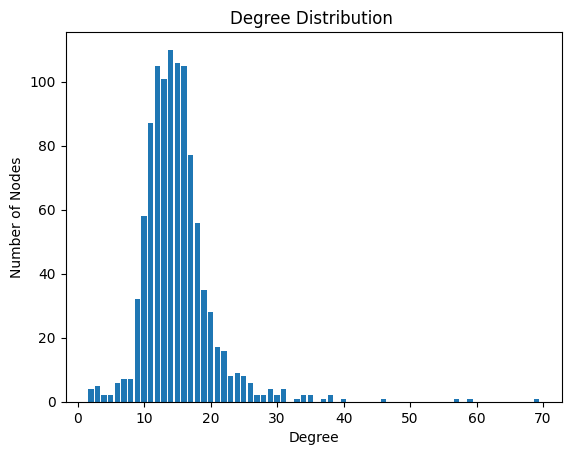

In [ ]:
import random
import csv
import matplotlib.pyplot as plt
import networkx as nx
# ********************* Random generator based on probability *****************************
def generate_network(n, avg_deg):
    nodes = [0]
    edges = []
    # Step 2
    for i in range(1, n):
        node = i
        neighbor = random.choice(nodes)
        nodes.append(node)
        edges.append((node, neighbor))
    
    fof = {}
    neighbors = {}
    for node in nodes:
        neighbors[node] = []
        fof[node] = []
    for edge in edges:
        neighbors[edge[0]].append(edge[1])
        neighbors[edge[1]].append(edge[0])

    for node in nodes:
        for neighbor in neighbors[node]:
            for fof_neighbor in neighbors[neighbor]: 
                if fof_neighbor != node and fof_neighbor not in neighbors[node] and fof_neighbor not in fof[node]:
                    fof[node].append(fof_neighbor)
    

    avg_degree = (2*(n-1))/n
    # print("average degree initionally ",avg_degree)
    nodes_list = list(range(n))
    total_degree = 2*(n-1)
    ind=0
    while avg_degree <= avg_deg:
        # node = random.choice(nodes_list)
        ind=ind%n 
        node=nodes_list[ind]
        ind+=1
        if len(fof[node]) > 0:
            chosen = random.choice(fof[node]) 
            r=2   
            s2=set()   
            s1 = len(set(neighbors[node]).intersection(neighbors[chosen]))
            for k in fof[node]:
                s3= set(neighbors[node]).intersection(neighbors[k])
                for x in s3:
                    s2.add(x)

            if len(s2)>0:
                r=s1/len(s2)
            p=random.random()
            if(p<=r):
                edges.append((node, chosen))
                neighbors[node].append(chosen)
                neighbors[chosen].append(node)
                total_degree += 2
            else:
              continue

            # Update the fof list for the affected nodes
            for neighbor in neighbors[node]:
                if neighbor != chosen :
                    for fof_neighbor in neighbors[neighbor]:
                        if fof_neighbor != node and fof_neighbor not in neighbors[node] and fof_neighbor not in fof[node]:
                            fof[node].append(fof_neighbor)
                else:
                    fof[node].remove(chosen)
            for neighbor in neighbors[chosen]:
                if neighbor != node:
                    for fof_neighbor in neighbors[neighbor]:
                        if fof_neighbor != chosen and fof_neighbor not in neighbors[chosen] and fof_neighbor not in fof[chosen]:
                            fof[chosen].append(fof_neighbor)
                else:
                    if node in fof[chosen]:
                        fof[chosen].remove(node)
        avg_degree = total_degree/n
    print("avrage degree :",avg_degree)
    return neighbors ,edges

n=1024
adj,edges=generate_network(n,15)  

# print(adj)
G = nx.Graph()
for i in range(n):
    G.add_node(i)

# print(len(edges),type(edges[0]))
for eg in edges:
    G.add_edge(eg[0],eg[1])

# ********************* store edges into file3 *****************
'''
header=["Node1","Node2"]
with open('file34.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    # write the header
    writer.writerow(header)

    # write the data
    for i in G.edges():
        writer.writerow(i)
'''

# *************** print properties of network ***********************
print("number of nodes:",len(G.nodes()))
print("number of edges :",len(G.edges()))
average_clustering_coefficient = nx.average_clustering(G)
print(f"Average clustering coefficient: {average_clustering_coefficient}")

triangles = nx.triangles(G)
num_triangles = sum(triangles.values()) / 3
print("Number of triangles:", num_triangles)
# *************** plot Degree distributio **********************
degrees = dict(G.degree())
degree_values = sorted(set(degrees.values()))
degree_counts = [list(degrees.values()).count(x) for x in degree_values]

plt.bar(degree_values, degree_counts)
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.title('Degree Distribution ')
plt.show()


# *****************set the colour for node ****************
# degrees = dict(G.degree())
# node_colors = [degrees[node] for node in G.nodes()]

# ******************** plot the graph **********************
# nx.draw(G, node_color=node_colors, with_labels=True)
# plt.show()



**Part-4**

avrage degree 10.001953125
number of nodes: 1024
number of edges : 5121
Average clustering coefficient: 0.266871014453624
Number of triangles: 3885.0


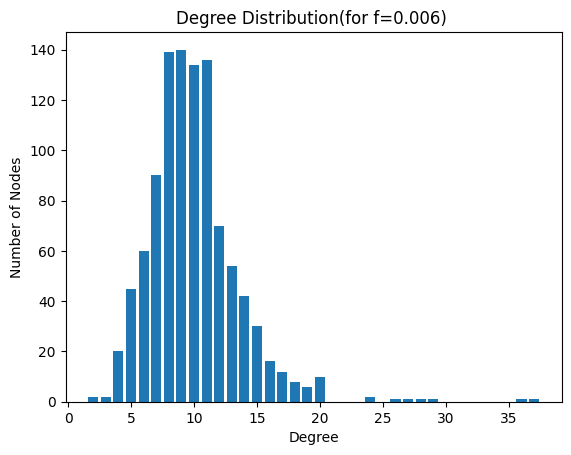

In [ ]:
import random
import csv
import matplotlib.pyplot as plt
import networkx as nx
# ********************* Random generator based on probability *****************************
def generate_network(n, avg_deg,f):
    nodes = [0]
    edges = []
    
    for i in range(1, n):
        node = i
        neighbor = random.choice(nodes)
        nodes.append(node)
        edges.append((node, neighbor))
    
    
    fof = {}
    neighbors = {}
    for node in nodes:
        neighbors[node] = []
        fof[node] = []
    for edge in edges:
        neighbors[edge[0]].append(edge[1])
        neighbors[edge[1]].append(edge[0])

    for node in nodes:
        for neighbor in neighbors[node]:
            for fof_neighbor in neighbors[neighbor]: 
                if fof_neighbor != node and fof_neighbor not in neighbors[node] and fof_neighbor not in fof[node]:
                    fof[node].append(fof_neighbor)
    
    avg_degree = (2*(n-1))/n
    # print("average degree initionally ",avg_degree)
    nodes_with_fof = list(range(n))
    total_degree = 2*(n-1)
    while avg_degree <= avg_deg:
        node = random.choice(nodes_with_fof)
        if len(fof[node]) > 0:
            chosen = random.choice(fof[node]) 
            r1=2   
            s2=set()  
            s1 = len(set(neighbors[node]).intersection(neighbors[chosen]))
            for k in fof[node]:
                s3= set(neighbors[node]).intersection(neighbors[k])
                for x in s3:
                    s2.add(x)
            if len(s2)>0:
                r1=f*(s1/len(s2))
            

            p=random.random()
            if(p<=r1):
                edges.append((node, chosen))
                neighbors[node].append(chosen)
                neighbors[chosen].append(node)
                total_degree += 2
            

            # Update the fof list for the affected nodes
                for neighbor in neighbors[node]:
                    if neighbor != chosen :
                        for fof_neighbor in neighbors[neighbor]:
                            if fof_neighbor != node and fof_neighbor not in neighbors[node] and fof_neighbor not in fof[node]:
                                fof[node].append(fof_neighbor)
                    else:
                        fof[node].remove(chosen)
                for neighbor in neighbors[chosen]:
                    if neighbor != node:
                        for fof_neighbor in neighbors[neighbor]:
                            if fof_neighbor != chosen and fof_neighbor not in neighbors[chosen] and fof_neighbor not in fof[chosen]:
                                fof[chosen].append(fof_neighbor)
                    else:
                        if node in fof[chosen]:
                            fof[chosen].remove(node)

        tmp=set(neighbors[node]).union(fof[node]).union({node})
        s4=set(nodes_with_fof).difference(tmp) 
        if(len(s4)>0):
            # probability to connect outeside from fof 
            chosen1=random.choice(list(s4))
            r2=(1-f)*(1/len(s4))

            p=random.random()
            if(p<=r2):
                edges.append((node, chosen1))
                neighbors[node].append(chosen1)
                neighbors[chosen1].append(node)
                total_degree += 2
        
                # Update the fof list for the affected nodes
                for neighbor in neighbors[node]:
                    if neighbor != chosen1 :
                        for fof_neighbor in neighbors[neighbor]:
                            if fof_neighbor != node and fof_neighbor not in neighbors[node] and fof_neighbor not in fof[node]:
                                fof[node].append(fof_neighbor)
                    else:
                        if(chosen1 in fof[node]):
                            fof[node].remove(chosen1)
                for neighbor in neighbors[chosen1]:
                    if neighbor != node:
                        for fof_neighbor in neighbors[neighbor]:
                            if fof_neighbor != chosen1 and fof_neighbor not in neighbors[chosen1] and fof_neighbor not in fof[chosen1]:
                                fof[chosen1].append(fof_neighbor)
                    else:
                        if node in fof[chosen1]:
                            fof[chosen1].remove(node)
            
        avg_degree = total_degree/n
    print("avrage degree",avg_degree)
    return neighbors,edges

n=1024
f=0.006
adj,edges=generate_network(n,10,f)  

# print(adj)
G = nx.Graph()
for i in range(n):
    G.add_node(i)
for eg in edges:
    G.add_edge(eg[0],eg[1])

# ///////////////////////////////////
'''header=["Node1","Node2"]
with open('file4.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    # write the header
    writer.writerow(header)

    # write the data
    for i in range(len(adj)):
        for j in adj[i]:
            data=[i,j]
            writer.writerow(data)
'''
# *************** print property of network ***********************
print("number of nodes:",len(G.nodes()))
print("number of edges :",len(G.edges()))
average_clustering_coefficient = nx.average_clustering(G)
print(f"Average clustering coefficient: {average_clustering_coefficient}")

triangles = nx.triangles(G)
num_triangles = sum(triangles.values()) / 3
print("Number of triangles:", num_triangles)


#********************plot degree distribution *********************
degrees = dict(G.degree())
degree_values = sorted(set(degrees.values()))
degree_counts = [list(degrees.values()).count(x) for x in degree_values]

plt.bar(degree_values, degree_counts)
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.title('Degree Distribution(for f=0.006) ')
plt.show()


# set the colour for node
# degrees = dict(G.degree())
# node_colors = [degrees[node] for node in G.nodes()]

# plot the graph
# nx.draw(G, node_color=node_colors, with_labels=True)
# plt.show()